##Mamadou DIOUF

#Mathematics and Computer Science M2 Track, UPEC & UGE

#Data science course project

In [1]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt

#Unnormalized Laplacien

Pairwise distances as weights

In [2]:
def spectral_clustering(data, n_clusters, gamma=1):
    """
    Performs spectral clustering on a given dataset.

    Args:
        data: 2D NumPy array containing the data points.
        n_clusters: Number of clusters to find.
        gamma: Kernel bandwidth for Gaussian kernel,1/2sigma^2.

    Returns:
        labels: Cluster assignments for each data point.
    """

    # 1. Compute the pairwise distances
    distances = pairwise_distances(data,)  #adjacency matrix


    # 2. Here we take as weights the pairwise distances
    weights=distances
    #print(weights)
    # 3. Compute degree matrix
    degrees = np.sum(weights, axis=1)
    degree_matrix = np.diag(degrees)

    # 4. Compute Laplacian matrix
    laplacian_matrix = degree_matrix - weights

    # 5. Compute eigenvectors and eigenvalues
    eigenvalues, eigenvectors = np.linalg.eig(laplacian_matrix)
    # Convert eigenvectors to real numbers if they are complex
    eigenvectors = np.real(eigenvectors)
    eigen_pairs = [(np.abs(eigenvalues[i]), eigenvectors[:, i]) for i in range(len(eigenvalues))]
    eigen_pairs.sort(key=lambda x: x[0])

    # 6. Select eigenvectors corresponding to k smallest eigenvalues
    embedding_matrix = np.array([pair[1] for pair in eigen_pairs[:n_clusters]]).T

    # 7. Apply k-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(embedding_matrix)

    return labels


In [3]:
# Example usage:
from sklearn.datasets import make_blobs

# Generate synthetic data
data, true_labels = make_blobs(n_samples=1000, centers=5, random_state=42,)

# Perform spectral clustering
labels = spectral_clustering(data, n_clusters=5)


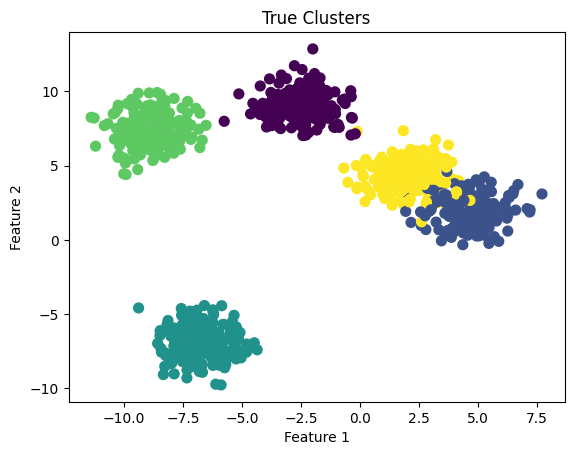

In [4]:
plt.scatter(data[:, 0], data[:, 1], c=true_labels, s=50, cmap='viridis')
plt.title('True Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

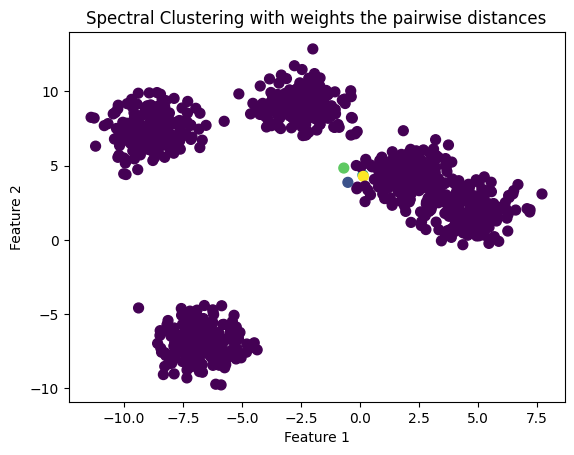

In [5]:
plt.scatter(data[:, 0], data[:, 1], c=labels, s=50, cmap='viridis')
plt.title('Spectral Clustering with weights the pairwise distances')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

Gaussian kernel as weights

In [6]:
def spectral_clustering_gaussian_un(data, n_clusters, gamma=1):
    """
    Performs spectral clustering on a given dataset.

    Args:
        data: 2D NumPy array containing the data points.
        n_clusters: Number of clusters to find.
        gamma: Kernel bandwidth for Gaussian kernel ,1/2sigma^2

    Returns:
        labels: Cluster assignments for each data point.
    """

    #1. compute pairwise distances
    distances = pairwise_distances(data,) #it's a adjacency matrix

    # 2. Compute Gaussian kernel weights
    weights = np.exp(-gamma * distances**2)

    # 3. Compute degree matrix
    degrees = np.sum(weights, axis=1)
    degree_matrix = np.diag(degrees)

    # 4. Compute Laplacian matrix
    laplacian_matrix = degree_matrix - weights

    # 5. Compute eigenvectors and eigenvalues
    eigenvalues, eigenvectors = np.linalg.eig(laplacian_matrix)
    # Convert eigenvectors to real numbers if they are complex
    eigenvectors = np.real(eigenvectors)
    eigen_pairs = [(np.abs(eigenvalues[i]), eigenvectors[:, i]) for i in range(len(eigenvalues))]
    eigen_pairs.sort(key=lambda x: x[0])

    # 6. Select eigenvectors corresponding to k smallest eigenvalues
    embedding_matrix = np.array([pair[1] for pair in eigen_pairs[:n_clusters]]).T

    # 7. Apply k-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(embedding_matrix)

    return labels


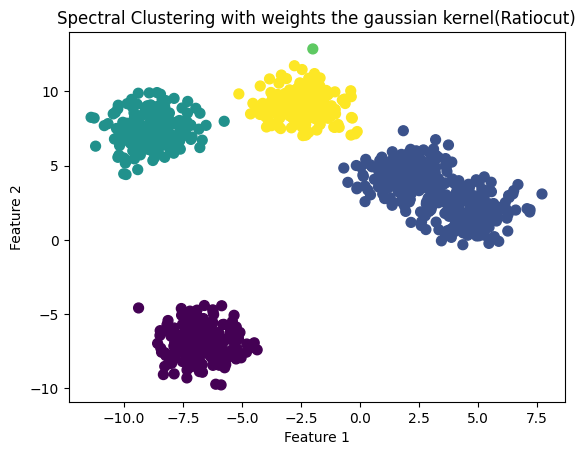

In [7]:
labels = spectral_clustering_gaussian_un(data, n_clusters=5)
plt.scatter(data[:, 0], data[:, 1], c=labels, s=50, cmap='viridis')
plt.title('Spectral Clustering with weights the gaussian kernel(Ratiocut)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [8]:
def spectral_clustering_norm_Lsym(data, n_clusters, gamma=1):
    """
    Performs spectral clustering on a given dataset.

    Args:
        data: 2D NumPy array containing the data points.
        n_clusters: Number of clusters to find.
        gamma: Kernel bandwidth for Gaussian kernel ,1/2sigma^2

    Returns:
        labels: Cluster assignments for each data point.
    """

    #1. compute pairwise distances
    distances = pairwise_distances(data,) #it's a adjacency matrix

    # 2. Compute Gaussian kernel weights
    weights = np.exp(-gamma * distances**2)

    # 3. Compute degree matrix
    degrees = np.sum(weights, axis=1)
    degree_matrix = np.diag(degrees)

    # 4. Compute Laplacian matrix
    laplacian_matrix = degree_matrix - weights

    #5 . compute Lsym a normalized laplacian
    Lsym = np.linalg.inv(degree_matrix**(0.5)) @ laplacian_matrix @ np.linalg.inv(degree_matrix**(0.5))
    # 5. Compute eigenvectors and eigenvalues
    eigenvalues, eigenvectors = np.linalg.eig(Lsym)
     # Convert eigenvectors to real numbers if they are complex
    eigenvectors = np.real(eigenvectors)
    eigen_pairs = [(np.abs(eigenvalues[i]), eigenvectors[:, i]) for i in range(len(eigenvalues))]
    eigen_pairs.sort(key=lambda x: x[0])

    # 6. Select eigenvectors corresponding to k smallest eigenvalues
    embedding_matrix = np.array([pair[1] for pair in eigen_pairs[:n_clusters]]).T

    # 7. Apply k-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(embedding_matrix)

    return labels



Text(0, 0.5, 'Feature 2')

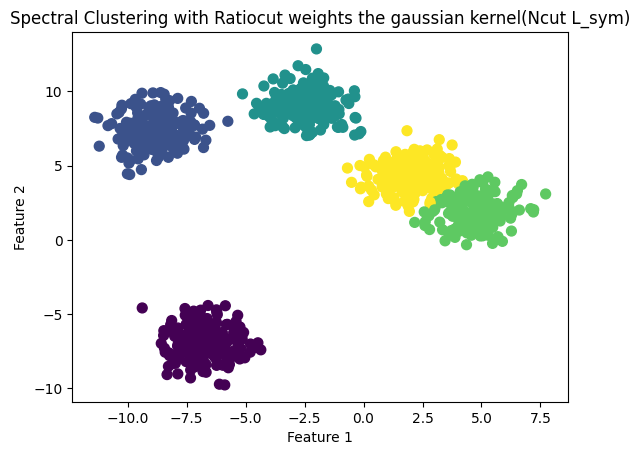

In [9]:
labels = spectral_clustering_norm_Lsym(data, n_clusters=5)
plt.scatter(data[:, 0], data[:, 1], c=labels, s=50, cmap='viridis')
plt.title('Spectral Clustering with Ratiocut weights the gaussian kernel(Ncut L_sym)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

In [10]:
def spectral_clustering_norm_Lrw(data, n_clusters, gamma=1):
    """
    Performs spectral clustering on a given dataset.

    Args:
        data: 2D NumPy array containing the data points.
        n_clusters: Number of clusters to find.
        gamma: Kernel bandwidth for Gaussian kernel ,1/2sigma^2

    Returns:
        labels: Cluster assignments for each data point.
    """

    #1. compute pairwise distances
    distances = pairwise_distances(data,) #it's a adjacency matrix

    # 2. Compute Gaussian kernel weights
    weights = np.exp(-gamma * distances**2)

    # 3. Compute degree matrix
    degrees = np.sum(weights, axis=1)
    degree_matrix = np.diag(degrees)

    # 4. Compute Laplacian matrix
    laplacian_matrix = degree_matrix - weights

    #5 . compute Lrw a normalized laplacian
    Lrw = np.linalg.inv(degree_matrix) @ laplacian_matrix
    # 5. Compute eigenvectors and eigenvalues
    eigenvalues, eigenvectors = np.linalg.eig(Lrw)
     # Convert eigenvectors to real numbers if they are complex
    eigenvectors = np.real(eigenvectors)
    eigen_pairs = [(np.abs(eigenvalues[i]), eigenvectors[:, i]) for i in range(len(eigenvalues))]
    eigen_pairs.sort(key=lambda x: x[0])

    # 6. Select eigenvectors corresponding to k smallest eigenvalues
    embedding_matrix = np.array([pair[1] for pair in eigen_pairs[:n_clusters]]).T

    # 7. Apply k-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(embedding_matrix)

    return labels



Text(0, 0.5, 'Feature 2')

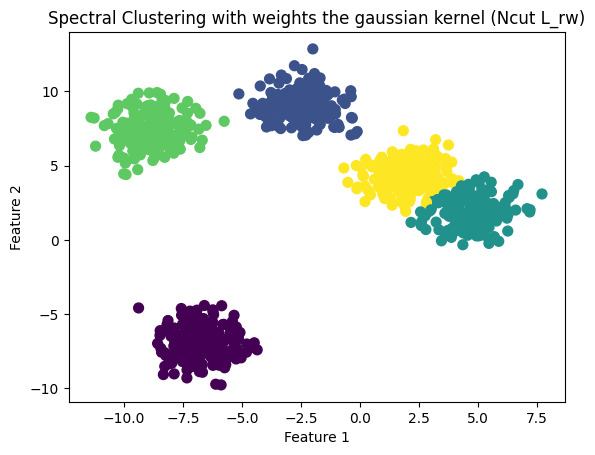

In [11]:
# Perform spectral clustering
labels = spectral_clustering_norm_Lrw(data, n_clusters=5)
plt.scatter(data[:, 0], data[:, 1], c=labels, s=50, cmap='viridis')
plt.title('Spectral Clustering with weights the gaussian kernel (Ncut L_rw)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

In [12]:
import pandas as pd

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
data = pd.read_csv('/content/drive/MyDrive/train_file.csv')
data.head()

,obj_ID,alpha,delta,u,g,r,i,z,cam_col,field_ID,redshift,plate,MJD,fiber_ID,class
0,1.237661e+18,155.057478,39.471934,22.32247,21.40113,20.51302,19.62691,19.34791,6,151,0.659869,4562,55570,45,GALAXY
1,1.237679e+18,29.186923,33.102558,25.85486,24.22573,21.48514,20.38426,19.38826,5,116,0.813819,7735,58136,763,GALAXY
2,1.237668e+18,143.780304,16.857367,22.62750,21.41766,19.54710,18.87770,18.39861,2,88,0.404277,5317,56000,499,GALAXY
3,1.237665e+18,154.753807,34.679618,20.25937,18.53387,17.58141,17.16960,16.85448,6,179,0.108840,1954,53357,63,GALAXY
4,1.237662e+18,212.519940,36.429773,22.03892,21.46501,21.32925,21.26120,21.17124,3,521,-0.001039,3855,55268,690,STAR


In [16]:
label = data['class']
X = data.drop(['class'], axis=1)

In [17]:
label.value_counts()

,count
class,
GALAXY,47585
STAR,17251
QSO,15164


In [18]:
label_data=label.iloc[:1000]
X_data=X.iloc[:1000]

In [19]:
label_data.value_counts()

,count
class,
GALAXY,621
STAR,193
QSO,186


In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, normalize

# Scaling the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_data)

# Normalizing the Data
X_normalized = normalize(X_scaled)

# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)

# Reducing the dimensions of the data
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

X_principal.head(2)

,P1,P2
0,0.042734,0.515299
1,0.690915,-0.094918


Text(0, 0.5, 'Feature 2')

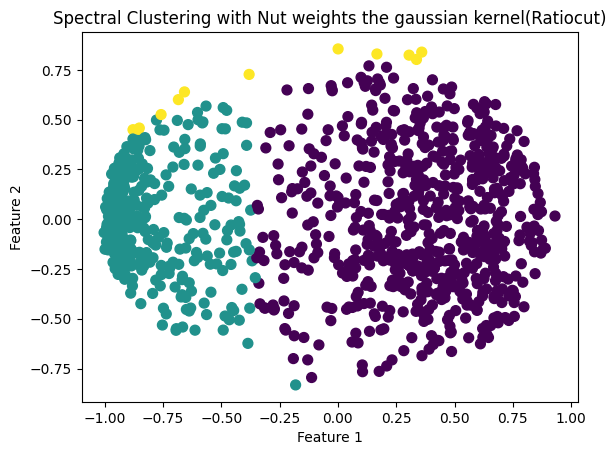

In [21]:
labels = spectral_clustering_gaussian_un(X_principal, n_clusters=3)
plt.scatter(X_principal['P1'], X_principal['P2'], c=labels, s=50, cmap='viridis')
plt.title('Spectral Clustering with Nut weights the gaussian kernel(Ratiocut)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

Text(0, 0.5, 'Feature 2')

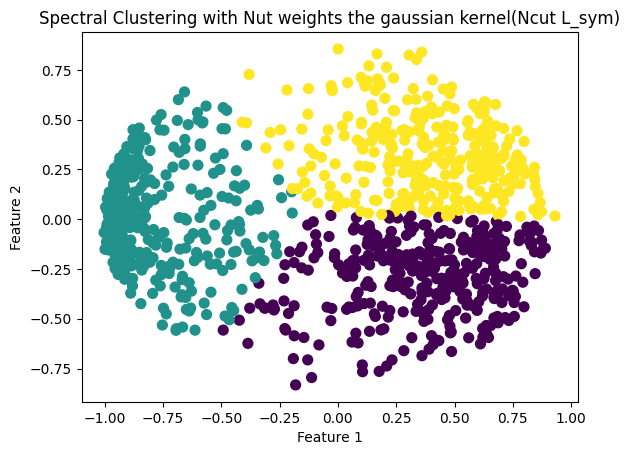

In [22]:
labels = spectral_clustering_norm_Lsym(X_principal, n_clusters=3)
plt.scatter(X_principal['P1'], X_principal['P2'], c=labels, s=50, cmap='viridis')
plt.title('Spectral Clustering with Nut weights the gaussian kernel(Ncut L_sym)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

Text(0, 0.5, 'Feature 2')

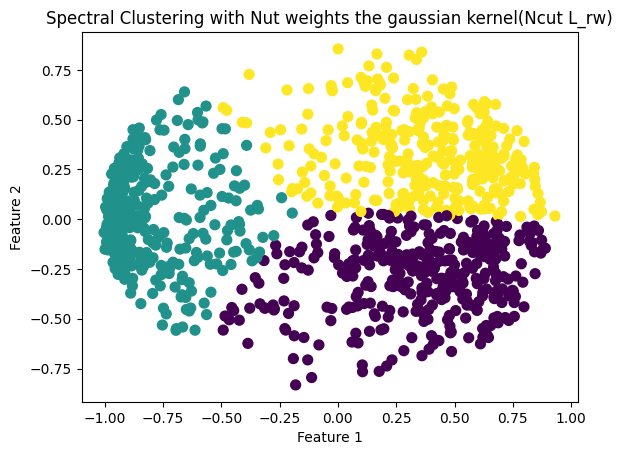

In [23]:
labels = spectral_clustering_norm_Lrw(X_principal, n_clusters=3)
plt.scatter(X_principal['P1'], X_principal['P2'], c=labels, s=50, cmap='viridis')
plt.title('Spectral Clustering with Nut weights the gaussian kernel(Ncut L_rw)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')